CHARGEMENT DES BIBLIOTHEQUES

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


CHARGEMENT DU JEU DE DONNEES

In [49]:
data1 = pd.read_csv("CLIENT.csv", sep='|', low_memory=False)
print(data1.shape)
print(list(data1.columns))

(845876, 10)
['IDCLIENT', 'CIVILITE', 'DATENAISSANCE', 'MAGASIN', 'DATEDEBUTADHESION', 'DATEREADHESION', 'DATEFINADHESION', 'VIP', 'CODEINSEE', 'PAYS']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [50]:
data1

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,VIP,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,13/05/2005 0:00:00,4/04/2017 0:00:00,30/04/2018 0:00:00,0,74224,FR
1,156023.0,MONSIEUR,7/08/1966 0:00:00,VLG,14/05/2005 0:00:00,21/06/2014 0:00:00,30/06/2016 0:00:00,0,74189,FR
2,124203.0,MADAME,NaN,BEA,16/03/2005 0:00:00,12/10/2017 0:00:00,31/10/2018 0:00:00,0,63070,FR
3,156190.0,MADAME,24/07/1976 0:00:00,SUR,28/08/2006 0:00:00,24/05/2015 0:00:00,31/05/2016 0:00:00,0,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,29/04/2006 0:00:00,18/12/2016 0:00:00,31/12/2017 0:00:00,0,31555,FR
...,...,...,...,...,...,...,...,...,...,...
845871,1970111.0,MONSIEUR,NaN,IAB,14/04/2011 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,0,38053,FR
845872,2297275.0,MONSIEUR,6/02/1988 0:00:00,SEM,7/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,0,57067,FR
845873,2305548.0,MONSIEUR,NaN,PRI,22/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,0,38318,FR
845874,84175.0,MADAME,7/04/1950 0:00:00,GAI,29/10/2002 0:00:00,7/01/2018 0:00:00,31/01/2019 0:00:00,0,74082,FR


In [51]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845876 entries, 0 to 845875
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   IDCLIENT           845876 non-null  float64
 1   CIVILITE           845876 non-null  object 
 2   DATENAISSANCE      507902 non-null  object 
 3   MAGASIN            845876 non-null  object 
 4   DATEDEBUTADHESION  845876 non-null  object 
 5   DATEREADHESION     507816 non-null  object 
 6   DATEFINADHESION    845876 non-null  object 
 7   VIP                845876 non-null  int64  
 8   CODEINSEE          818455 non-null  object 
 9   PAYS               845873 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 64.5+ MB
None


Nous allons procéder à la suppression des clients VIP, qui ont un comportement atypique qui viendra biaiser nos résultats.

In [52]:
# Supprimer les lignes où la valeur de la colonne 'VIP' est égale à 1
data1 = data1[data1['VIP'] != 1]

# Vérifier la nouvelle forme du DataFrame
print(data1.shape)

(735425, 10)


In [53]:
data1 = data1.drop("VIP",axis=1)

Vérification du traitement.

In [54]:
data1

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,13/05/2005 0:00:00,4/04/2017 0:00:00,30/04/2018 0:00:00,74224,FR
1,156023.0,MONSIEUR,7/08/1966 0:00:00,VLG,14/05/2005 0:00:00,21/06/2014 0:00:00,30/06/2016 0:00:00,74189,FR
2,124203.0,MADAME,NaN,BEA,16/03/2005 0:00:00,12/10/2017 0:00:00,31/10/2018 0:00:00,63070,FR
3,156190.0,MADAME,24/07/1976 0:00:00,SUR,28/08/2006 0:00:00,24/05/2015 0:00:00,31/05/2016 0:00:00,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,29/04/2006 0:00:00,18/12/2016 0:00:00,31/12/2017 0:00:00,31555,FR
...,...,...,...,...,...,...,...,...,...
845871,1970111.0,MONSIEUR,NaN,IAB,14/04/2011 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,38053,FR
845872,2297275.0,MONSIEUR,6/02/1988 0:00:00,SEM,7/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,57067,FR
845873,2305548.0,MONSIEUR,NaN,PRI,22/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,38318,FR
845874,84175.0,MADAME,7/04/1950 0:00:00,GAI,29/10/2002 0:00:00,7/01/2018 0:00:00,31/01/2019 0:00:00,74082,FR


La ligne de code ci-dessous nous permet de formater le format de la date.

In [55]:
# Adapter le format de date pour les colonnes spécifiées
date_columns = ['DATENAISSANCE', 'DATEDEBUTADHESION', 'DATEREADHESION', 'DATEFINADHESION']
for col in date_columns:
    data1[col] = pd.to_datetime(data1[col], format='%d/%m/%Y %H:%M:%S',errors = 'coerce').dt.strftime('%d/%m/%Y')

Vérification du traitement.

In [56]:
data1

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,13/05/2005,04/04/2017,30/04/2018,74224,FR
1,156023.0,MONSIEUR,07/08/1966,VLG,14/05/2005,21/06/2014,30/06/2016,74189,FR
2,124203.0,MADAME,NaN,BEA,16/03/2005,12/10/2017,31/10/2018,63070,FR
3,156190.0,MADAME,24/07/1976,SUR,28/08/2006,24/05/2015,31/05/2016,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,29/04/2006,18/12/2016,31/12/2017,31555,FR
...,...,...,...,...,...,...,...,...,...
845871,1970111.0,MONSIEUR,NaN,IAB,14/04/2011,06/01/2018,31/01/2019,38053,FR
845872,2297275.0,MONSIEUR,06/02/1988,SEM,07/03/2013,06/01/2018,31/01/2019,57067,FR
845873,2305548.0,MONSIEUR,NaN,PRI,22/03/2013,06/01/2018,31/01/2019,38318,FR
845874,84175.0,MADAME,07/04/1950,GAI,29/10/2002,07/01/2018,31/01/2019,74082,FR


Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque civilité, pour identifier les éventuels regroupements à effectuer. 

In [57]:
#modalités variables:
data1['CIVILITE'].value_counts(dropna = False)

CIVILITE
MADAME      393703
MONSIEUR    337360
Mr            1431
Mme           1284
madame         976
monsieur       671
Name: count, dtype: int64

Il convient de procéder aux regroupements ci-dessous.

In [58]:
#regroupement des modalités:
data1['CIVILITE']=np.where(data1['CIVILITE'] =='MADAME', 'Madame', data1['CIVILITE']) 
data1['CIVILITE']=np.where(data1['CIVILITE'] =='Mme', 'Madame', data1['CIVILITE'])
data1['CIVILITE']=np.where(data1['CIVILITE'] =='madame', 'Madame', data1['CIVILITE']) 
data1['CIVILITE']=np.where(data1['CIVILITE'] =='MONSIEUR', 'Monsieur', data1['CIVILITE'])
data1['CIVILITE']=np.where(data1['CIVILITE'] =='Mr', 'Monsieur', data1['CIVILITE'])
data1['CIVILITE']=np.where(data1['CIVILITE'] =='monsieur', 'Monsieur', data1['CIVILITE'])

Vérification du traitement.

In [59]:
data1['CIVILITE'].value_counts(dropna = False)

CIVILITE
Madame      395963
Monsieur    339462
Name: count, dtype: int64

Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque magasin, pour identifier les éventuels regroupements à effectuer.

In [60]:
data1['MAGASIN'].value_counts(dropna = False)

MAGASIN
PRI    23963
SEY    23572
VIB    22223
SUR    20923
MOU    20887
       ...  
VIV     3187
SAL     2836
STR     2667
EST     1145
BAR     1039
Name: count, Length: 67, dtype: int64

Les données à traiter concernant la France, la série de code ci-dessous nous permet de ne conserver que ce pays.

In [61]:
# Filtrer les lignes pour ne garder que celles avec "France" dans la colonne "Pays"
data1 = data1[data1['PAYS'] == 'FR']

# Réindexer le DataFrame après avoir filtré les lignes
data1.reset_index(drop=True, inplace=True)

In [62]:
data1['PAYS'].value_counts(dropna = False)

PAYS
FR    720090
Name: count, dtype: int64

La serie de codes ci-dessous nous permet de traiter la date de naissance des clients afin d'en déterminer l'âge puis des tranches d'âges.

In [63]:
#Convertir la colonne de date de naissance en objet datetime :

data1['DATENAISSANCE'] = pd.to_datetime(data1['DATENAISSANCE'],errors = 'coerce')

#En créer une nouvelle colonne pour l'âge en calculant la différence entre la date actuelle et la date de naissance :

from datetime import datetime
today = datetime.today()
data1['AGE'] = today.year - data1['DATENAISSANCE'].dt.year
#Discrétiser l'âge en créant des catégories d'âge. Par exemple, diviser en groupes d'âge :
bins = [18, 30, 45, 60, 100]
data1['AGE_GROUP'] = pd.cut(data1['AGE'], bins, labels=['AGE DE 18-30', 'AGE DE 31-45', 'AGE DE 46-60', 'AGE DE 61-100'])

C:\Users\belga\AppData\Local\Temp\ipykernel_30612\2152871429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DATENAISSANCE'] = pd.to_datetime(data1['DATENAISSANCE'],errors = 'coerce')
C:\Users\belga\AppData\Local\Temp\ipykernel_30612\2152871429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AGE'] = today.year - data1['DATENAISSANCE'].dt.year
C:\Users\belga\AppData\Local\Temp\ipykernel_30612\2152871429.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Vérification du traitement.

In [64]:
data1['AGE_GROUP'].value_counts(dropna = False)

AGE_GROUP
NaN              548518
AGE DE 61-100     67546
AGE DE 46-60      57057
AGE DE 31-45      42700
AGE DE 18-30       4269
Name: count, dtype: int64

Après ce traitement, il convient de renommer la variable concernée.

In [65]:
# Renommer la colonne 'DATENAISSANCE' en 'AGE'
data1 = data1.rename(columns={'DATENAISSANCE': 'AGE'})

Vérification du traitement.

In [66]:
data1

,IDCLIENT,CIVILITE,AGE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,PAYS,AGE,AGE_GROUP
0,155891.0,Madame,NaT,VLG,13/05/2005,04/04/2017,30/04/2018,74224,FR,NaN,NaN
1,156023.0,Monsieur,1966-07-08,VLG,14/05/2005,21/06/2014,30/06/2016,74189,FR,58.0,AGE DE 46-60
2,124203.0,Madame,NaT,BEA,16/03/2005,12/10/2017,31/10/2018,63070,FR,NaN,NaN
3,156190.0,Madame,NaT,SUR,28/08/2006,24/05/2015,31/05/2016,92026,FR,NaN,NaN
4,144444.0,Monsieur,NaT,LAB,29/04/2006,18/12/2016,31/12/2017,31555,FR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,NaT,IAB,14/04/2011,06/01/2018,31/01/2019,38053,FR,NaN,NaN
720086,2297275.0,Monsieur,1988-06-02,SEM,07/03/2013,06/01/2018,31/01/2019,57067,FR,36.0,AGE DE 31-45
720087,2305548.0,Monsieur,NaT,PRI,22/03/2013,06/01/2018,31/01/2019,38318,FR,NaN,NaN
720088,84175.0,Madame,1950-07-04,GAI,29/10/2002,07/01/2018,31/01/2019,74082,FR,74.0,AGE DE 61-100


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET, l'âge et les tranches d'âges en caractère. Nous n'avons pas nécessité à conserver ces valeurs en numérique.

In [67]:
data1['IDCLIENT'] = data1['IDCLIENT'].astype(str)
data1['AGE'] = data1['AGE'].astype(str)
data1['AGE_GROUP'] = data1['AGE_GROUP'].astype(str)

Vérification du traitement.

In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720090 entries, 0 to 720089
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   IDCLIENT           720090 non-null  object
 1   CIVILITE           720090 non-null  object
 2   AGE                720090 non-null  object
 3   MAGASIN            720090 non-null  object
 4   DATEDEBUTADHESION  720090 non-null  object
 5   DATEREADHESION     410990 non-null  object
 6   DATEFINADHESION    720090 non-null  object
 7   CODEINSEE          709392 non-null  object
 8   PAYS               720090 non-null  object
 9   AGE                720090 non-null  object
 10  AGE_GROUP          720090 non-null  object
dtypes: object(11)
memory usage: 60.4+ MB


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [69]:
print(data1.duplicated().sum())
data1 = data1.drop_duplicates()

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes.

In [70]:
# Tableau des valeurs manquantes par colonne
missing_values = data1.isnull().sum()
missing_percent = (missing_values / len(data1)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                   Missing Values  Percentage
IDCLIENT                        0    0.000000
CIVILITE                        0    0.000000
AGE                             0    0.000000
MAGASIN                         0    0.000000
DATEDEBUTADHESION               0    0.000000
DATEREADHESION             309100   42.925190
DATEFINADHESION                 0    0.000000
CODEINSEE                   10698    1.485648
PAYS                            0    0.000000
AGE                             0    0.000000
AGE_GROUP                       0    0.000000


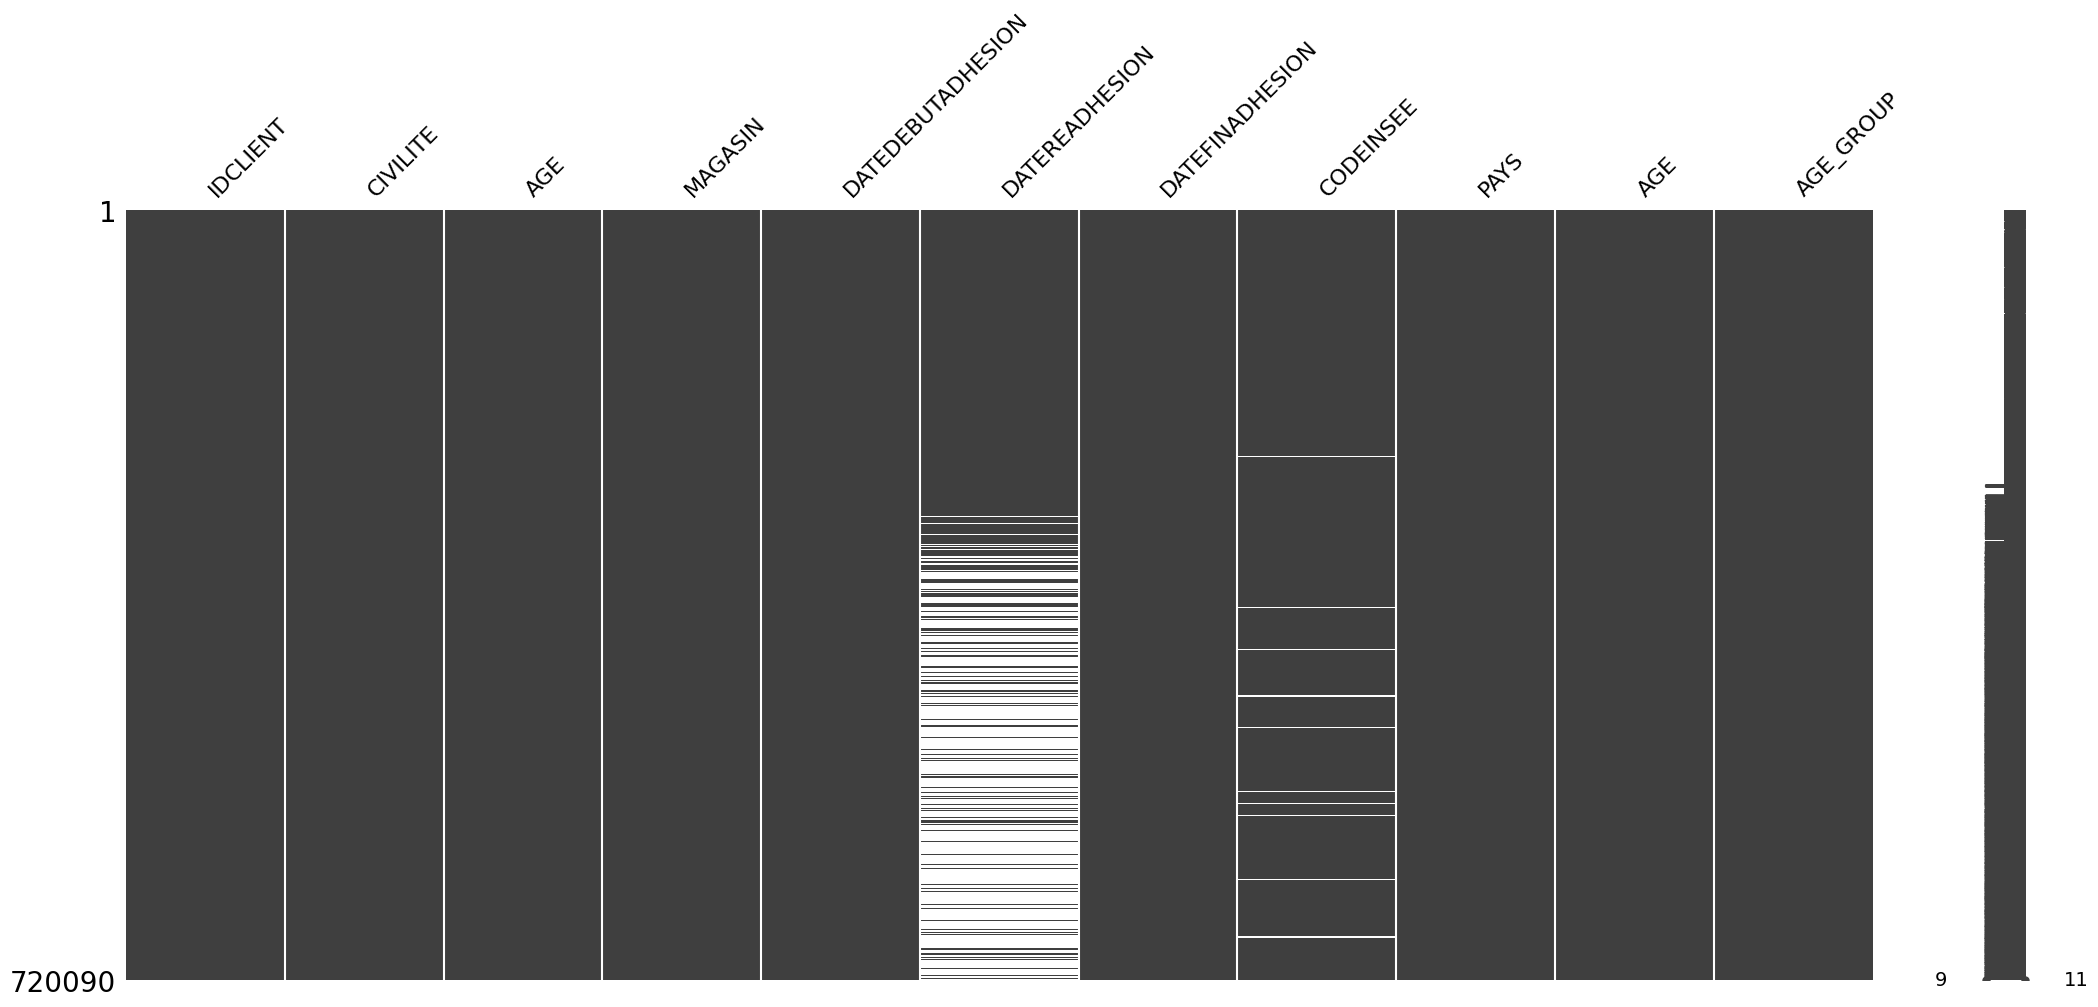

In [71]:
# Visualiser les valeurs manquantes avec missingno
import missingno as msno
msno.matrix(data1)
plt.show()

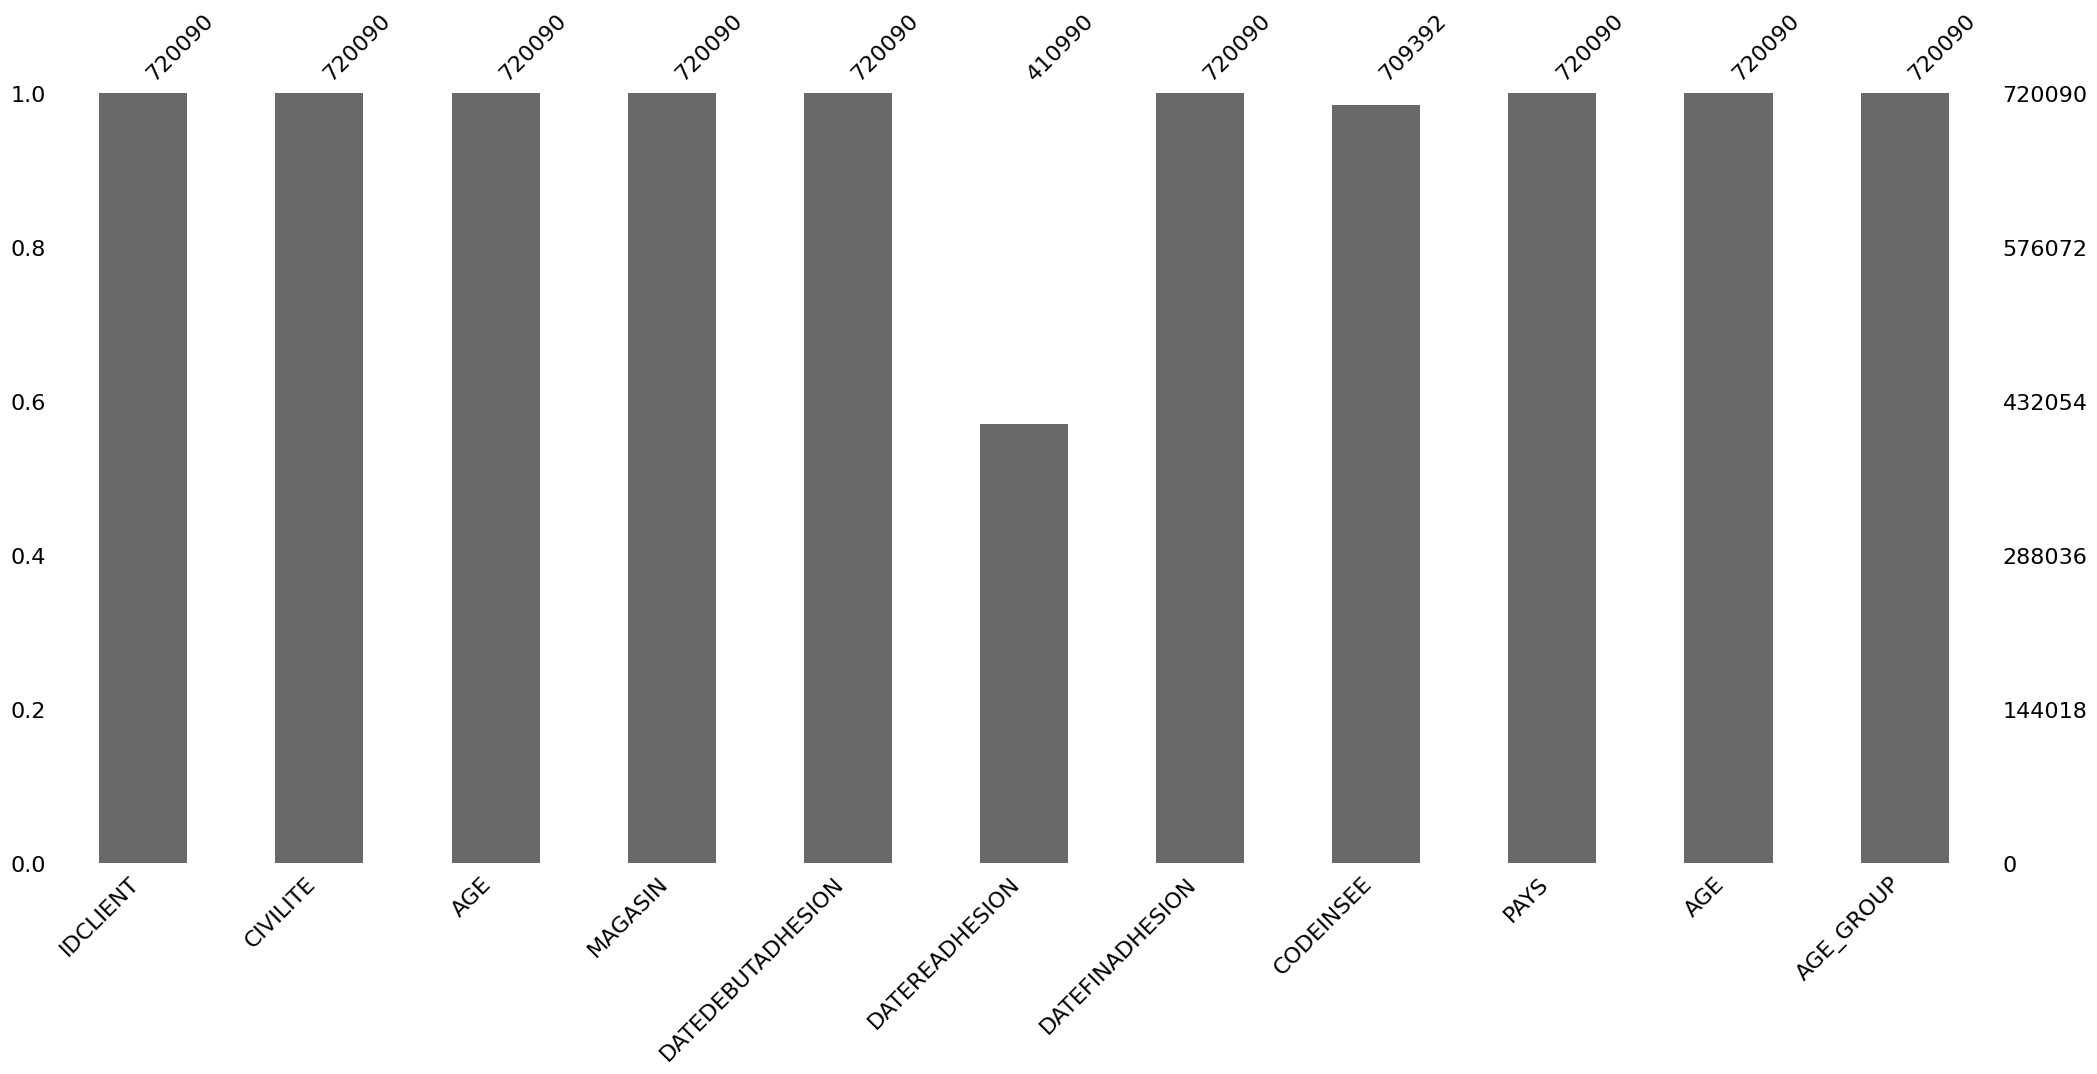

In [72]:
msno.bar(data1)
plt.show()

La série de codes ci-dessous nous permet de traiter les valeurs manquantes détéctées, sur les variables concernées.

In [73]:
# Interpolation des dates manquantes
data1['DATEREADHESION'] = data1['DATEREADHESION'].interpolate(method='time')

# Afficher le DataFrame après l'interpolation
print(data1)

         IDCLIENT  CIVILITE         AGE MAGASIN DATEDEBUTADHESION  \
0        155891.0    Madame         NaT     VLG        13/05/2005   
1        156023.0  Monsieur  1966-07-08     VLG        14/05/2005   
2        124203.0    Madame         NaT     BEA        16/03/2005   
3        156190.0    Madame         NaT     SUR        28/08/2006   
4        144444.0  Monsieur         NaT     LAB        29/04/2006   
...           ...       ...         ...     ...               ...   
720085  1970111.0  Monsieur         NaT     IAB        14/04/2011   
720086  2297275.0  Monsieur  1988-06-02     SEM        07/03/2013   
720087  2305548.0  Monsieur         NaT     PRI        22/03/2013   
720088    84175.0    Madame  1950-07-04     GAI        29/10/2002   
720089  1280004.0  Monsieur         NaT     SGL        23/06/2007   

       DATEREADHESION DATEFINADHESION CODEINSEE PAYS   AGE      AGE_GROUP  
0          04/04/2017      30/04/2018     74224   FR   nan            nan  
1          21/06/20

C:\Users\belga\AppData\Local\Temp\ipykernel_30612\1410952053.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data1['DATEREADHESION'] = data1['DATEREADHESION'].interpolate(method='time')


In [74]:
data1['CODEINSEE'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
720085    False
720086    False
720087    False
720088    False
720089    False
Name: CODEINSEE, Length: 720090, dtype: bool

In [75]:
data1.dropna(subset=['CODEINSEE'], inplace=True)

In [76]:
data1['DATEREADHESION'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
720085    False
720086    False
720087    False
720088    False
720089    False
Name: DATEREADHESION, Length: 709392, dtype: bool

In [77]:
data1.dropna(subset=['DATEREADHESION'], inplace=True)

In [78]:
data1['AGE_GROUP'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
720085    False
720086    False
720087    False
720088    False
720089    False
Name: AGE_GROUP, Length: 407389, dtype: bool

In [79]:
data1['AGE_GROUP'].value_counts()

AGE_GROUP
nan              326057
AGE DE 61-100     39498
AGE DE 46-60      27990
AGE DE 31-45      13240
AGE DE 18-30        604
Name: count, dtype: int64

In [80]:
data1['AGE_GROUP'] = data1['AGE_GROUP'].replace(np.nan, "Inconnue")


In [81]:
data1['AGE_GROUP']=data1[['AGE_GROUP']].applymap(lambda x: "Inconnue" if x=='nan' else x)


C:\Users\belga\AppData\Local\Temp\ipykernel_30612\4281832796.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1['AGE_GROUP']=data1[['AGE_GROUP']].applymap(lambda x: "Inconnue" if x=='nan' else x)


In [43]:
data1['AGE_GROUP'].value_counts()

AGE_GROUP
Inconnue         326057
AGE DE 61-100     39498
AGE DE 46-60      27990
AGE DE 31-45      13240
AGE DE 18-30        604
Name: count, dtype: int64

In [82]:
data1.dropna(subset=['AGE_GROUP'], inplace=True)

Vérification du taitement.

In [83]:
data1.isnull().sum()

IDCLIENT             0
CIVILITE             0
AGE                  0
MAGASIN              0
DATEDEBUTADHESION    0
DATEREADHESION       0
DATEFINADHESION      0
CODEINSEE            0
PAYS                 0
AGE                  0
AGE_GROUP            0
dtype: int64

Le traitement des valeurs aberrantes ne concernant que les variables numériques, nous n'allons pas procéder à ce traitement car aucune de nos variables n'est concernées sur ce dataframe.

Suppression des colonnes dont les informations nous serons pas nécessairement utiles dans le cadre de notre projet.

In [84]:
data1.drop(columns=['PAYS'], inplace=True)

In [85]:
data1.drop(columns=['AGE'], inplace=True)

In [86]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,AGE_GROUP
0,155891.0,Madame,VLG,13/05/2005,04/04/2017,30/04/2018,74224,Inconnue
1,156023.0,Monsieur,VLG,14/05/2005,21/06/2014,30/06/2016,74189,AGE DE 46-60
2,124203.0,Madame,BEA,16/03/2005,12/10/2017,31/10/2018,63070,Inconnue
3,156190.0,Madame,SUR,28/08/2006,24/05/2015,31/05/2016,92026,Inconnue
4,144444.0,Monsieur,LAB,29/04/2006,18/12/2016,31/12/2017,31555,Inconnue
...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,14/04/2011,06/01/2018,31/01/2019,38053,Inconnue
720086,2297275.0,Monsieur,SEM,07/03/2013,06/01/2018,31/01/2019,57067,AGE DE 31-45
720087,2305548.0,Monsieur,PRI,22/03/2013,06/01/2018,31/01/2019,38318,Inconnue
720088,84175.0,Madame,GAI,29/10/2002,07/01/2018,31/01/2019,74082,AGE DE 61-100


La série de codes ci-dessous nous permet de modifier le format des dates de début et de fin d'adhésion afin de calculer l'ancienneté des clients.

In [87]:
import datetime
from datetime import timedelta

In [88]:
data1['DATEDEBUTADHESION'] = pd.to_datetime(data1['DATEDEBUTADHESION'])

C:\Users\belga\AppData\Local\Temp\ipykernel_30612\1125558055.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['DATEDEBUTADHESION'] = pd.to_datetime(data1['DATEDEBUTADHESION'])


In [89]:
data1['DATEDEBUTADHESION'] = data1['DATEDEBUTADHESION'].dt.year.astype(int)

In [90]:
data1['DATEFINADHESION'] = pd.to_datetime(data1['DATEFINADHESION'])

C:\Users\belga\AppData\Local\Temp\ipykernel_30612\124944321.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['DATEFINADHESION'] = pd.to_datetime(data1['DATEFINADHESION'])


In [91]:
data1['DATEFINADHESION'] = data1['DATEFINADHESION'].dt.year.astype(int)

In [92]:
if 'DATEDEBUTADHESION' in data1.columns:
    Date_début = data1['DATEDEBUTADHESION']
    print(Date_début.head())
else:
    print("La colonne 'DATEDEBUTADHESION' n'existe pas dans le DataFrame.")

0    2005
1    2005
2    2005
3    2006
4    2006
Name: DATEDEBUTADHESION, dtype: int32


In [93]:
if 'DATEFINADHESION' in data1.columns:
    Date_fin = data1['DATEFINADHESION']
    print(Date_fin.head())
else:
    print("La colonne 'DATEFINADHESION' n'existe pas dans le DataFrame.")

0    2018
1    2016
2    2018
3    2016
4    2017
Name: DATEFINADHESION, dtype: int32


In [94]:
ANCIENNETE = Date_fin - Date_début

In [95]:
print(ANCIENNETE)

0         13
1         11
2         13
3         10
4         11
          ..
720085     8
720086     6
720087     6
720088    17
720089    12
Length: 407389, dtype: int32


Nous allons maintenant intégrer cette variables d'ancienneté à notre jeu de données.

In [96]:
data1.insert(loc=6, column='ANCIENNETE', value=ANCIENNETE)

In [97]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,ANCIENNETE,CODEINSEE,AGE_GROUP
0,155891.0,Madame,VLG,2005,04/04/2017,2018,13,74224,Inconnue
1,156023.0,Monsieur,VLG,2005,21/06/2014,2016,11,74189,AGE DE 46-60
2,124203.0,Madame,BEA,2005,12/10/2017,2018,13,63070,Inconnue
3,156190.0,Madame,SUR,2006,24/05/2015,2016,10,92026,Inconnue
4,144444.0,Monsieur,LAB,2006,18/12/2016,2017,11,31555,Inconnue
...,...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,2011,06/01/2018,2019,8,38053,Inconnue
720086,2297275.0,Monsieur,SEM,2013,06/01/2018,2019,6,57067,AGE DE 31-45
720087,2305548.0,Monsieur,PRI,2013,06/01/2018,2019,6,38318,Inconnue
720088,84175.0,Madame,GAI,2002,07/01/2018,2019,17,74082,AGE DE 61-100


Ci-dessous, nous procédons à la suppression des dates de début et de fin d'adhésion car nous n'en avons plus besoin.

In [98]:
data1.drop(columns=['DATEDEBUTADHESION'], inplace=True)

In [99]:
data1.drop(columns=['DATEFINADHESION'], inplace=True)

Vérification des traitements.

In [100]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEREADHESION,ANCIENNETE,CODEINSEE,AGE_GROUP
0,155891.0,Madame,VLG,04/04/2017,13,74224,Inconnue
1,156023.0,Monsieur,VLG,21/06/2014,11,74189,AGE DE 46-60
2,124203.0,Madame,BEA,12/10/2017,13,63070,Inconnue
3,156190.0,Madame,SUR,24/05/2015,10,92026,Inconnue
4,144444.0,Monsieur,LAB,18/12/2016,11,31555,Inconnue
...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,06/01/2018,8,38053,Inconnue
720086,2297275.0,Monsieur,SEM,06/01/2018,6,57067,AGE DE 31-45
720087,2305548.0,Monsieur,PRI,06/01/2018,6,38318,Inconnue
720088,84175.0,Madame,GAI,07/01/2018,17,74082,AGE DE 61-100


In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407389 entries, 0 to 720089
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   IDCLIENT        407389 non-null  object
 1   CIVILITE        407389 non-null  object
 2   MAGASIN         407389 non-null  object
 3   DATEREADHESION  407389 non-null  object
 4   ANCIENNETE      407389 non-null  int32 
 5   CODEINSEE       407389 non-null  object
 6   AGE_GROUP       407389 non-null  object
dtypes: int32(1), object(6)
memory usage: 23.3+ MB


Le code ci-dessous va également nous permettre de modifier le format de la date de ré-adhésion.

In [102]:
data1["DATEREADHESION"] = pd.to_datetime(data1['DATEREADHESION'].str.strip(), format='%d/%m/%Y')

Puis, nous supprimons les dates de ré-adhésion post 2017 car le périmètre temps de notre projet de dépasse pas l'année 2017.

In [103]:
data1['ANCIENNETE_READ'] = np.where(data1['DATEREADHESION'] >= "01/01/2018", 'Inconnue', data1['ANCIENNETE'])


In [104]:
data1['ANCIENNETE_READ']

0               13
1               11
2               13
3               10
4               11
            ...   
720085    Inconnue
720086    Inconnue
720087    Inconnue
720088    Inconnue
720089    Inconnue
Name: ANCIENNETE_READ, Length: 407389, dtype: object

In [105]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEREADHESION,ANCIENNETE,CODEINSEE,AGE_GROUP,ANCIENNETE_READ
0,155891.0,Madame,VLG,2017-04-04,13,74224,Inconnue,13
1,156023.0,Monsieur,VLG,2014-06-21,11,74189,AGE DE 46-60,11
2,124203.0,Madame,BEA,2017-10-12,13,63070,Inconnue,13
3,156190.0,Madame,SUR,2015-05-24,10,92026,Inconnue,10
4,144444.0,Monsieur,LAB,2016-12-18,11,31555,Inconnue,11
...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,2018-01-06,8,38053,Inconnue,Inconnue
720086,2297275.0,Monsieur,SEM,2018-01-06,6,57067,AGE DE 31-45,Inconnue
720087,2305548.0,Monsieur,PRI,2018-01-06,6,38318,Inconnue,Inconnue
720088,84175.0,Madame,GAI,2018-01-07,17,74082,AGE DE 61-100,Inconnue


Chargement du jeu de données REF_MAGASIN

In [107]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\REF_MAGASIN.csv"
data5 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data5.shape)
print(list(data5.columns))

(67, 4)
['CODESOCIETE', 'VILLE', 'LIBELLEDEPARTEMENT', 'LIBELLEREGIONCOMMERCIALE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [108]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CODESOCIETE               67 non-null     object
 1   VILLE                     67 non-null     object
 2   LIBELLEDEPARTEMENT        67 non-null     int64 
 3   LIBELLEREGIONCOMMERCIALE  67 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


Aperçu du jeu de données.

In [109]:
data5

,CODESOCIETE,VILLE,LIBELLEDEPARTEMENT,LIBELLEREGIONCOMMERCIALE
0,MET,METZ-TESSY,74,Rhône-Alpes
1,ALB,GILLY SUR ISERE,73,Rhône-Alpes
2,ALM,LES MILLES,13,Littoral
3,AVI,VILLENEUVE-LES-AVIGNON,30,Littoral
4,BEA,BEAUMONT,63,Centre-Paris
...,...,...,...,...
62,STR,SISTERON,4,Littoral
63,NEV,NEVERS CEDEX,58,Centre-Paris
64,BSN,CESSON,77,Centre-Paris
65,CAG,CAGNES SUR MER,6,Littoral


Afin d'exploiter de façon optimale les informations, nous allons convetir le LIBELLE DEPARTEMENT en caractère. 

In [110]:
#transformation libellé département en object
data5['LIBELLEDEPARTEMENT'] = data5['LIBELLEDEPARTEMENT'].astype(str)

Vérification du traitement.

In [111]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CODESOCIETE               67 non-null     object
 1   VILLE                     67 non-null     object
 2   LIBELLEDEPARTEMENT        67 non-null     object
 3   LIBELLEREGIONCOMMERCIALE  67 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [112]:
print(data5.duplicated().sum())
data = data5.drop_duplicates()

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [113]:
pd.DataFrame(index=data.columns, columns=['%_missing_values'], data= (data.isna().sum().values / len(data)*100))

,%_missing_values
CODESOCIETE,0.0
VILLE,0.0
LIBELLEDEPARTEMENT,0.0
LIBELLEREGIONCOMMERCIALE,0.0


Désormais, nous n'avons aucune valeur nulle ou manquante dans nos données, ni de doublons.

On a pu identifier le format de chaque variable ainsi que leurs modalités.

In [114]:
#modalités variables:
data5['CODESOCIETE'].value_counts(dropna = False)

CODESOCIETE
MET    1
VLG    1
SEY    1
SGL    1
SJV    1
      ..
PEP    1
PON    1
PRI    1
QUE    1
RMA    1
Name: count, Length: 67, dtype: int64

In [115]:
data5['VILLE'].value_counts(dropna = False)

VILLE
METZ-TESSY             1
VILLE-LA-GRAND         1
SEYSSINS               1
SAINT-GENEST-LERPT     1
SAINT-JEAN-DE-VEDAS    1
                      ..
PERPIGNAN              1
LE PONTET              1
SAINT-PRIEST           1
QUETIGNY               1
RUEIL MALMAISON        1
Name: count, Length: 67, dtype: int64

In [116]:
data5['LIBELLEREGIONCOMMERCIALE'].value_counts(dropna = False)

LIBELLEREGIONCOMMERCIALE
Rhône-Alpes       20
Littoral          19
Alsace-Est        15
Centre-Paris      12
Vente en ligne     1
Name: count, dtype: int64

In [117]:
data5['LIBELLEREGIONCOMMERCIALE'].unique()

array(['Rhône-Alpes', 'Littoral', 'Centre-Paris', 'Alsace-Est',
       'Vente en ligne'], dtype=object)

In [118]:
# Importer la librairie pandas
import pandas as pd

# Créer un DataFrame de test avec la modalité 'Vente en ligne'
data = {'Region': ['Rhône-Alpes', 'Littoral', 'Centre-Paris', 'Alsace-Est', 'Vente en ligne']}
df = pd.DataFrame(data)

# Afficher le DataFrame avant la suppression
print("Avant la suppression :")
print(df)

# Supprimer la modalité 'Vente en ligne'
df = df[df['Region'] != 'Vente en ligne']

# Réinitialiser les index après la suppression
df.reset_index(drop=True, inplace=True)

# Afficher le DataFrame après la suppression
print("\nAprès la suppression :")
print(df)

Avant la suppression :
           Region
0     Rhône-Alpes
1        Littoral
2    Centre-Paris
3      Alsace-Est
4  Vente en ligne

Après la suppression :
         Region
0   Rhône-Alpes
1      Littoral
2  Centre-Paris
3    Alsace-Est


Chargement du jeu de données.

In [7]:
data6 = pd.read_csv("Donnees_communales_2020_INSEE.csv", sep=';', low_memory=False,encoding='latin-1')
print(data6.shape)
print(list(data6.columns))

(34945, 26)
['Code', 'Libellé', 'Région', 'Département', 'Emploi total', 'Administration publique', 'Agriculture', 'Bâtiment-Travaux Publics', 'Commerce inter-entreprises', 'Conception, Recherche', 'Culture, Loisirs', 'Distribution', 'Education, Formation', 'Entretien, Réparation', 'Fabrication', 'Gestion', 'Transports, Logistique', 'Prestations Intellectuelles', 'Santé, Action Sociale', 'Services de Proximité', 'Commerce \ninter-entreprises', 'Conception, Recherche.1', 'Culture, Loisirs.1', 'Gestion.1', 'Prestations Intellectuelles.1', 'Total']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [8]:
data6

,Code,Libellé,Région,Département,Emploi total,Administration publique,Agriculture,Bâtiment-Travaux Publics,Commerce inter-entreprises,"Conception, Recherche",...,"Transports, Logistique",Prestations Intellectuelles,"Santé, Action Sociale",Services de Proximité,Commerce \ninter-entreprises,"Conception, Recherche.1","Culture, Loisirs.1",Gestion.1,Prestations Intellectuelles.1,Total
0,1001,L'Abergement-Clémenciat,84,1,72,5,5,14,5,0,...,0,0,0,14,0,0,0,0,0,0
1,1002,L'Abergement-de-Varey,84,1,25,0,15,0,0,0,...,0,0,0,0,0,0,4,0,0,4
2,1004,Ambérieu-en-Bugey,84,1,7 697,842,23,514,229,79,...,1 017,247,808,630,46,53,42,155,84,380
3,1005,Ambérieux-en-Dombes,84,1,332,5,4,59,10,0,...,0,5,54,35,5,0,5,5,0,15
4,1006,Ambléon,84,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34940,97613,M'Tsangamouji,6,976,495,128,10,77,0,0,...,15,5,15,45,0,0,0,0,0,0
34941,97614,Ouangani,6,976,1 254,168,67,155,0,5,...,48,13,90,105,0,3,5,10,8,25
34942,97615,Pamandzi,6,976,1 642,460,10,55,10,10,...,125,27,72,200,3,5,35,10,10,62
34943,97616,Sada,6,976,1 447,175,45,210,0,0,...,117,8,35,190,0,0,5,15,3,23


In [9]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34945 entries, 0 to 34944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Code                           34945 non-null  object
 1   Libellé                        34945 non-null  object
 2   Région                         34945 non-null  int64 
 3   Département                    34945 non-null  object
 4   Emploi total                   34945 non-null  object
 5   Administration publique        34945 non-null  object
 6   Agriculture                    34945 non-null  object
 7   Bâtiment-Travaux Publics       34945 non-null  object
 8   Commerce inter-entreprises     34945 non-null  object
 9   Conception, Recherche          34945 non-null  object
 10  Culture, Loisirs               34945 non-null  object
 11  Distribution                   34945 non-null  object
 12  Education, Formation           34945 non-null  object
 13  E

Afin d'exploiter de façon optimale les informations, nous allons convetir les codes postaux en caractère. Nous n'avons pas nécessité à conserver ces valeurs en numérique.

In [10]:
data6['Région'] = data6['Région'].astype(str)

Vérification du traitement

In [11]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34945 entries, 0 to 34944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Code                           34945 non-null  object
 1   Libellé                        34945 non-null  object
 2   Région                         34945 non-null  object
 3   Département                    34945 non-null  object
 4   Emploi total                   34945 non-null  object
 5   Administration publique        34945 non-null  object
 6   Agriculture                    34945 non-null  object
 7   Bâtiment-Travaux Publics       34945 non-null  object
 8   Commerce inter-entreprises     34945 non-null  object
 9   Conception, Recherche          34945 non-null  object
 10  Culture, Loisirs               34945 non-null  object
 11  Distribution                   34945 non-null  object
 12  Education, Formation           34945 non-null  object
 13  E

Suppression des colonnes dont les informations nous serons pas nécessairement utiles dans le cadre de notre projet.

La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [12]:
print(data6.duplicated().sum())
data6 = data6.drop_duplicates()

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes.

In [13]:
pd.DataFrame(index=data6.columns, columns=['%_missing_values'], data= (data6.isna().sum().values / len(data6)*100))

,%_missing_values
Code,0.0
Libellé,0.0
Région,0.0
Département,0.0
Emploi total,0.0
Administration publique,0.0
Agriculture,0.0
Bâtiment-Travaux Publics,0.0
Commerce inter-entreprises,0.0
"Conception, Recherche",0.0


Le traitement des valeurs aberrantes ne concernant que les variables numériques, nous n'allons pas procéder à ce traitement car aucune de nos variables n'est concernées sur ce dataframe.